Using TensorFlow backend.


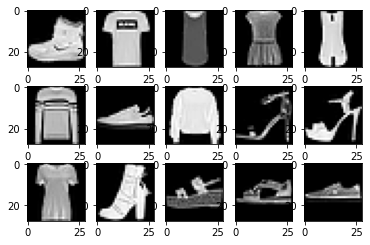

In [1]:
from keras.utils import np_utils
from src.models import *
from src.viz import *
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

visualize_fashion_mnist([x for x in range(15)])

def run_mnist(name, cnn=False, epochs=10, lr=1e-03):
    (x_train, y_train), (x_test, y_test) = load_data()
    # Set input shape and reshape dataset
    input_shape = (28, 28, 1)
    if cnn:
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')     
    else:
        num_pixels = x_train.shape[1] * x_train.shape[2]
        x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
    
    # Scale values from [0, 255] to [0, 1]
    x_train = x_train / 255
    x_test = x_test / 255
    
    # One-hot encode the target labels
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    # Build model
    model = create_model(name, input_shape, num_classes, epochs=epochs, lr=lr)
    print_model(model,f"img/{name}.png")
    
    
    # Train the model
    tensorboard = TensorBoard(log_dir=f'logs/{name}')
    
    if lr == True:
        callbacks = [tensorboard, ReduceLROnPlateau()]
    else:
        callbacks = [tensorboard]
    

    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=epochs, 
                        batch_size=200,
                        verbose=1,
                        callbacks=callbacks
                        )
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    
    return history

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 173us/sample - loss: 0.7477 - accuracy: 0.7238 - val_loss: 0.4898 - val_accuracy: 0.8226
Epoch 2/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4597 - accuracy: 0.8334 - val_loss: 0.4005 - val_accuracy: 0.8569
Epoch 3/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3996 - accuracy: 0.8561 - val_loss: 0.3661 - val_accuracy: 0.8667
Epoch 4/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3676 - accuracy: 0.8669 - val_loss: 0.3512 - val_accuracy: 0.8725
Epoch 5/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3446 - accuracy: 0.8737 - val_loss: 0.3305 - val_accuracy: 0.8830
Epoch 6/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3239 - accuracy: 0.8814 - val_loss: 0.3269 - val_accuracy: 0.8812
Epoch 7/15
60000/60000 [==============================

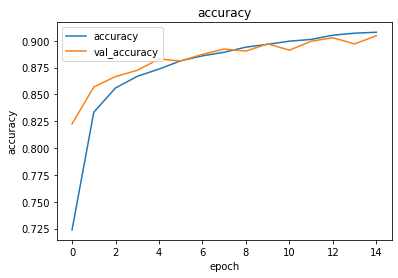

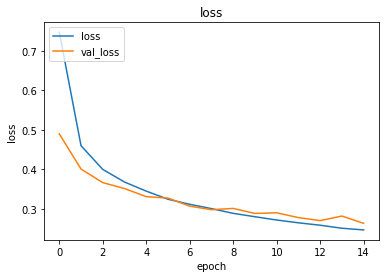

In [2]:
# A bit more complex CNN
cnn2_hist = run_mnist('mnist_cnn_v2', cnn=True, epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 278us/sample - loss: 0.5076 - accuracy: 0.8128 - val_loss: 2.9998 - val_accuracy: 0.1913
Epoch 2/15
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3140 - accuracy: 0.8835 - val_loss: 0.4757 - val_accuracy: 0.8204
Epoch 3/15
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2699 - accuracy: 0.9000 - val_loss: 0.2759 - val_accuracy: 0.9003
Epoch 4/15
60000/60000 [==============================] - 21s 345us/sample - loss: 0.2489 - accuracy: 0.9074 - val_loss: 0.2827 - val_accuracy: 0.8975
Epoch 5/15
60000/60000 [==============================] - 22s 364us/sample - loss: 0.2297 - accuracy: 0.9148 - val_loss: 0.2453 - val_accuracy: 0.9122
Epoch 6/15
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2136 - accuracy: 0.9209 - val_loss: 0.2594 - val_accuracy: 0.9059
Epoch 7/15
60000/60000 [====================

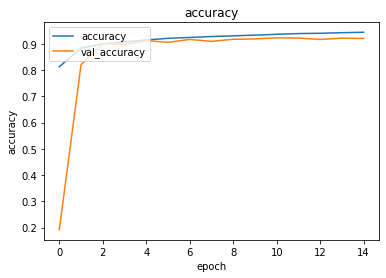

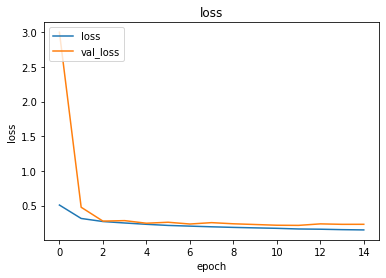

In [3]:
# A bit more complex CNN
# Added Batch Normalization layers and tweaked the existing layers
# Also added a Dropout layer between the two convolutional-pooling-normalization blocks
cnn3_hist = run_mnist('mnist_cnn_v3', cnn=True, epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 24s 398us/sample - loss: 0.4643 - accuracy: 0.8291 - val_loss: 2.8965 - val_accuracy: 0.3402
Epoch 2/15
60000/60000 [==============================] - 24s 392us/sample - loss: 0.2967 - accuracy: 0.8893 - val_loss: 0.4031 - val_accuracy: 0.8457
Epoch 3/15
60000/60000 [==============================] - 23s 383us/sample - loss: 0.2518 - accuracy: 0.9072 - val_loss: 0.2473 - val_accuracy: 0.9073
Epoch 4/15
60000/60000 [==============================] - 24s 407us/sample - loss: 0.2227 - accuracy: 0.9179 - val_loss: 0.2369 - val_accuracy: 0.9125
Epoch 5/15
60000/60000 [==============================] - 25s 410us/sample - loss: 0.2038 - accuracy: 0.9244 - val_loss: 0.2353 - val_accuracy: 0.9139
Epoch 6/15
60000/60000 [==============================] - 26s 427us/sample - loss: 0.1870 - accuracy: 0.9302 - val_loss: 0.2382 - val_accuracy: 0.9172
Epoch 7/15
60000/60000 [====================

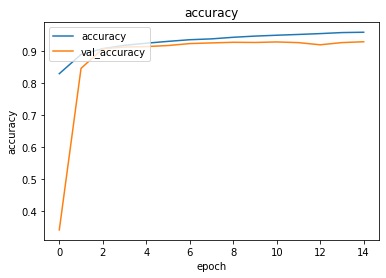

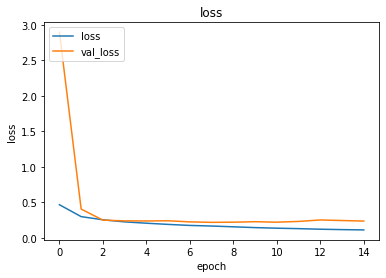

In [4]:
# Added a Stochastic Gradient Descent with Momentum optimizer
cnn4_hist = run_mnist('mnist_cnn_v4', cnn=True, epochs=15, lr=1e-02)

In [ ]:
analyse_accuracy([cnn2_hist, cnn3_hist, cnn4_hist], 
                 ['cnn_v2', 'cnn_v3', 'cnn_v4'])
